In [41]:
import warnings
import numpy as np
import pandas as pd
import pyfolio as pf
import empyrical

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10000)
warnings.filterwarnings('ignore')

stock_id = 'CPALL'
df_set = pd.read_csv('data/SET Index Historical Data.csv', index_col=0, parse_dates=True)
df_stock_price = pd.read_csv('data/yahoo/{}.csv'.format(stock_id), index_col=0, parse_dates=True)
df_stock_finsheet = pd.read_csv('data/jitta/{}.csv'.format(stock_id), index_col=0, parse_dates=True)

df_set.index = df_set.index.tz_localize('UTC')
df_stock_price.index = df_stock_price.index.tz_localize('UTC')

Start date,2010-01-04
End date,2019-12-30
Total months,116
,Backtest
Annual return,23.3%
Cumulative returns,712.7%
Annual volatility,25.9%
Sharpe ratio,0.94
Calmar ratio,0.65
Stability,0.89
Max drawdown,-35.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.70,2013-02-20,2013-08-30,2015-08-11,645
1,28.61,2018-05-07,2018-10-24,2019-07-10,308
2,24.67,2010-11-01,2011-02-11,2011-04-20,123
3,23.90,2015-09-02,2016-01-04,2016-07-04,219
4,17.66,2019-07-19,2019-12-30,NaT,NaN


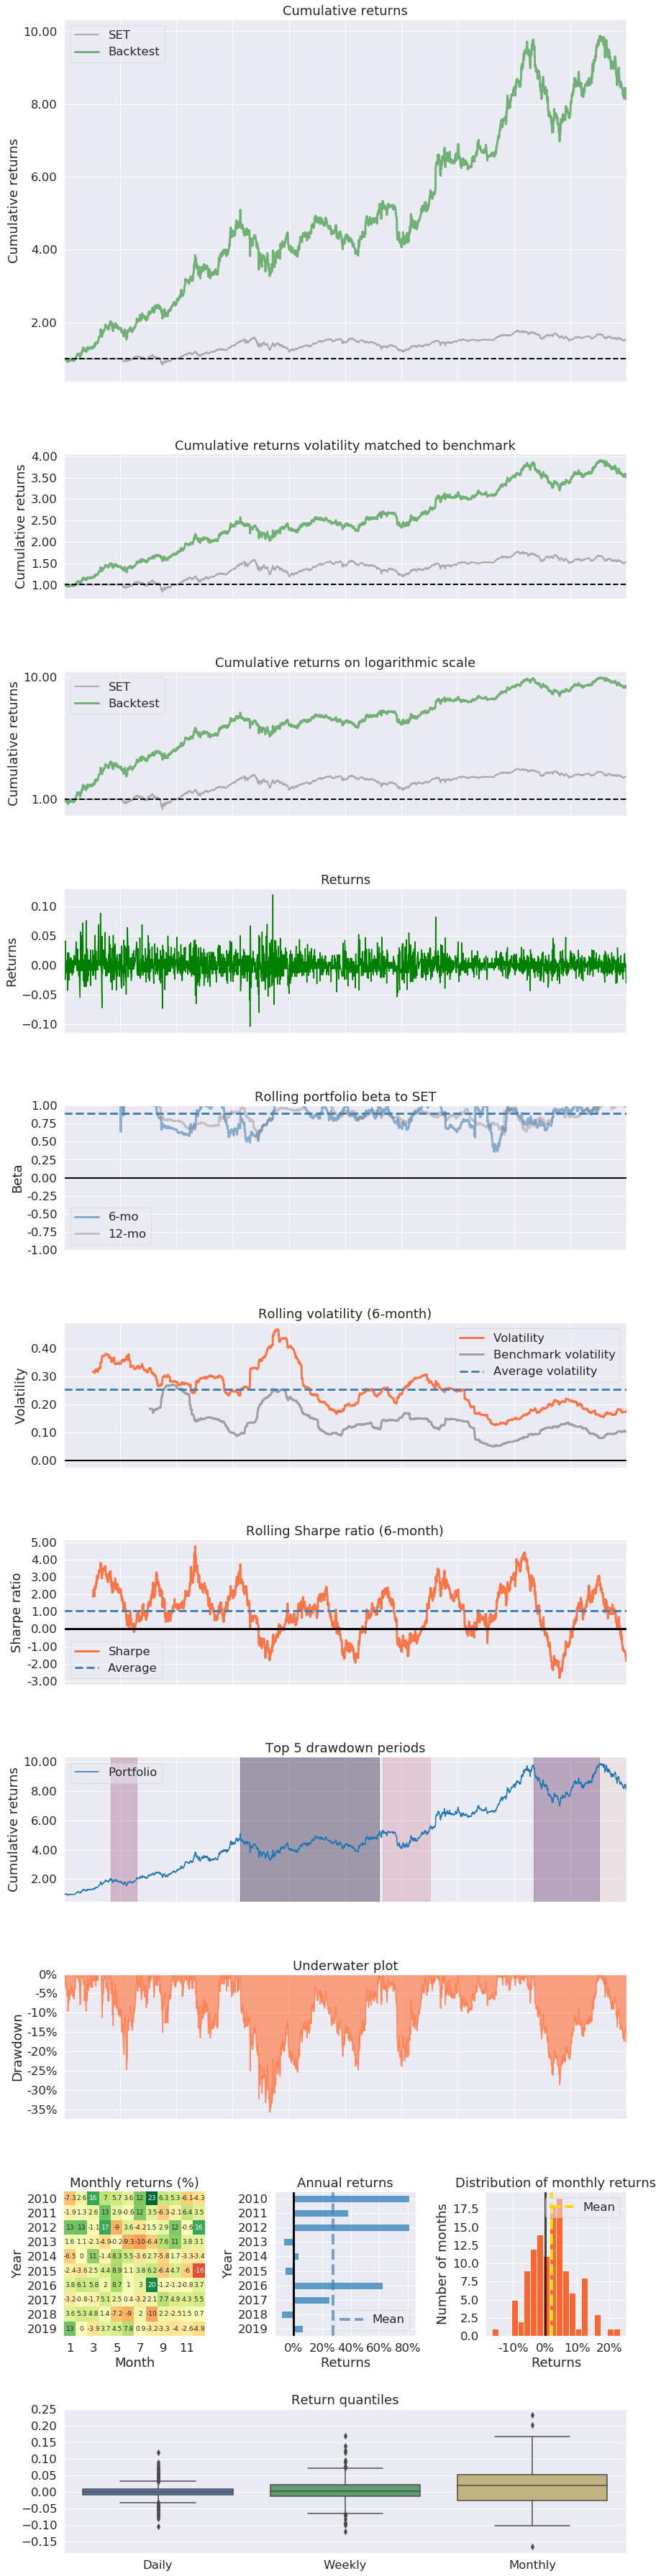

In [42]:
stock_rets = df_stock_price['Return'].loc['2010-01-01':'2019-12-31'].rename(stock_id)
index_rets = df_set['Close'].pct_change().dropna().loc[stock_rets.index].rename('SET')
empyrical.periods.APPROX_BDAYS_PER_YEAR = stock_rets.count()/10

stock_stats = pf.timeseries.perf_stats(returns=stock_rets, factor_returns=index_rets)
stock_stats
pf.create_returns_tear_sheet(returns=stock_rets, benchmark_rets=index_rets, live_start_date=None)

In [37]:
(np.prod(np.array(stock_rets.values.tolist())+1))**0.1-1

0.23307940877235644

In [43]:
(np.prod(np.array(stock_rets.values.tolist())+1))-1

7.126629403321223

In [49]:
np.array(stock_rets.values.tolist()).var()

0.0002736599938677867